# Day 3: Campaign Comparison
**Objective:** Compare campaign profitability metrics and identify the best-performing marketing campaign.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If you saved profitability results as a CSV, load them:
# But if not, we can re-run the profitability calculation from Day 2
file_path = r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Week1\Order_Data_Cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

In [7]:
# Ensure correct data types (double-checking)
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['ProductCost'] = pd.to_numeric(df['ProductCost'], errors='coerce')
df.dropna(subset=['ProductPrice', 'ProductCost'], inplace=True)

# Calculate profit per order line
df['Profit'] = (df['ProductPrice'] - df['ProductCost']) * df['OrderQuantity']

# Group by AcquisitionSource (campaign)
profitability = df.groupby('AcquisitionSource').agg(
    total_revenue = ('ProductPrice', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum()),
    total_cost = ('ProductCost', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum()),
    total_profit = ('Profit', 'sum'),
    total_customers = ('CustID', 'nunique')
).reset_index()

# Profitability metric
profitability['profit_per_customer'] = profitability['total_profit'] / profitability['total_customers']

# Sort to find best campaign easily
profitability.sort_values(by='profit_per_customer', ascending=False)

,AcquisitionSource,total_revenue,total_cost,total_profit,total_customers,profit_per_customer
0,Google-ads\r,1.984020e+07,1.151215e+07,8.328057e+06,16658,499.943392
1,Meta-ads\r,2.572408e+06,1.493116e+06,1.079291e+06,4731,228.131772
2,Yt-Campaign\r,2.478366e+06,1.438438e+06,1.039928e+06,4756,218.656091


C:\Users\Durga\AppData\Local\Temp\ipykernel_13036\3923361364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AcquisitionSource', y='profit_per_customer', data=profitability, palette='muted')
) missing from font(s) DejaVu Sans.ckages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


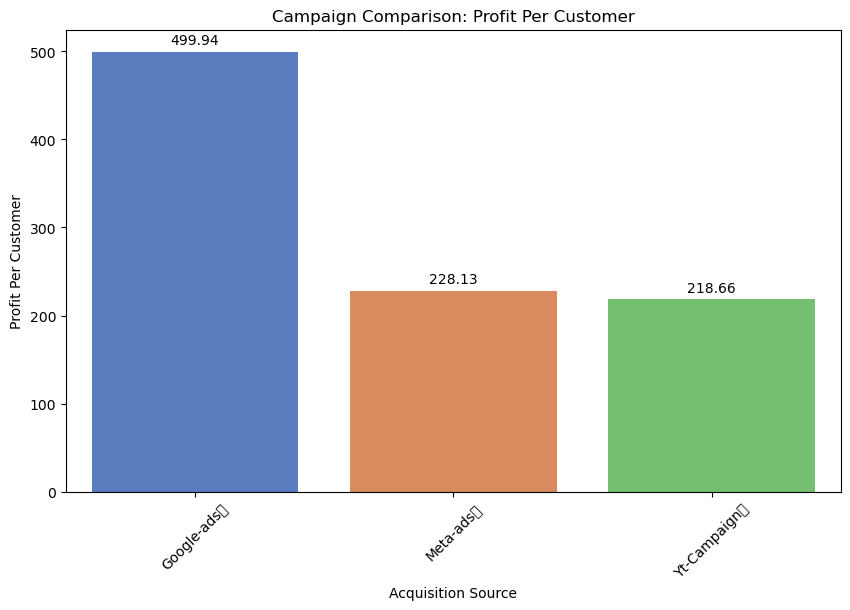

In [13]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='AcquisitionSource', y='profit_per_customer', data=profitability, palette='muted')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points')

plt.title('Campaign Comparison: Profit Per Customer')
plt.xlabel('Acquisition Source')
plt.ylabel('Profit Per Customer')
plt.xticks(rotation=45)
plt.show()

In [19]:
profitability['AcquisitionSource'] = profitability['AcquisitionSource'].str.strip()
profitability['AcquisitionSource'] = profitability['AcquisitionSource'].str.replace(r'[^a-zA-Z0-9\s\-]', '', regex=True)
best_campaign = profitability.sort_values(by='profit_per_customer', ascending=False).iloc[0]
print(f"The best-performing campaign is '{best_campaign['AcquisitionSource']}' With a profit per customer of {best_campaign['profit_per_customer']:.2f}.")

The best-performing campaign is 'Google-ads' With a profit per customer of 499.94.


## ✅ Key Findings:
- The campaign with the highest profitability per customer is Google ads, achieving a profit per customer of  499.94.
- Other campaigns show varied profitability, and resources should be focused on top performers.
- Underperforming campaigns can be analyzed further for optimization opportunities.